# Credit Card Fraud Detection- Capstone Project

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 97kB/s 
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime as dt

from sklearn import metrics
from sklearn import preprocessing


# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import numpy as np
# import os
# from scipy.misc import imread, imresize
# import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Creditfraud.zip

Archive:  /content/drive/MyDrive/Creditfraud.zip
  inflating: creditcard.csv          


# Exploratory data analysis

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking the statistical view of the dataset provided 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Here we will observe the distribution of our classes
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#checking the percentage of the class 
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)


99.82725143693798
0.1727485630620034


In [ ]:
#counting the class values
classes.value_counts()

284315    1
492       1
Name: Class, dtype: int64

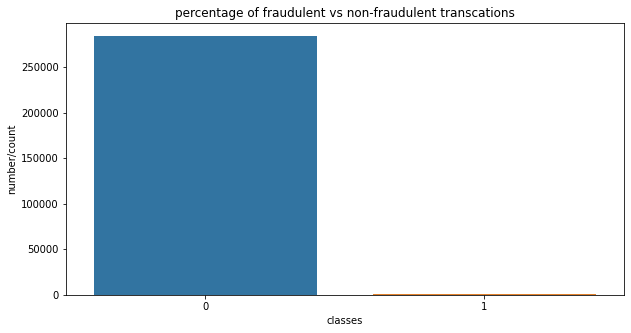

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
sns.countplot(df["Class"])
plt.xlabel("classes")
plt.ylabel("number/count")
plt.title("percentage of fraudulent vs non-fraudulent transcations")
plt.show()

In [ ]:
#percentage representation of the classes
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100



In [ ]:
#veiwing the columns of the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

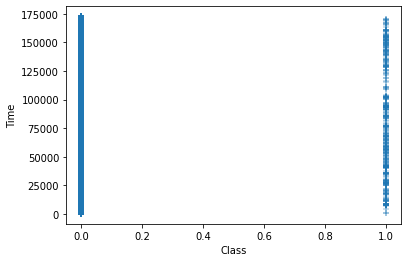

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class', y='Time', data= df, marker = '+')
plt.show()

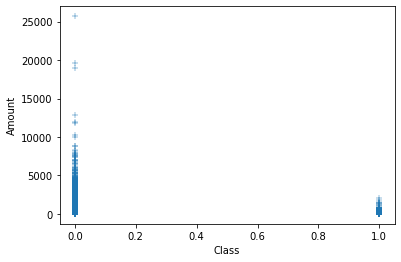

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Class', y='Amount', data= df, marker = '+')
plt.show()

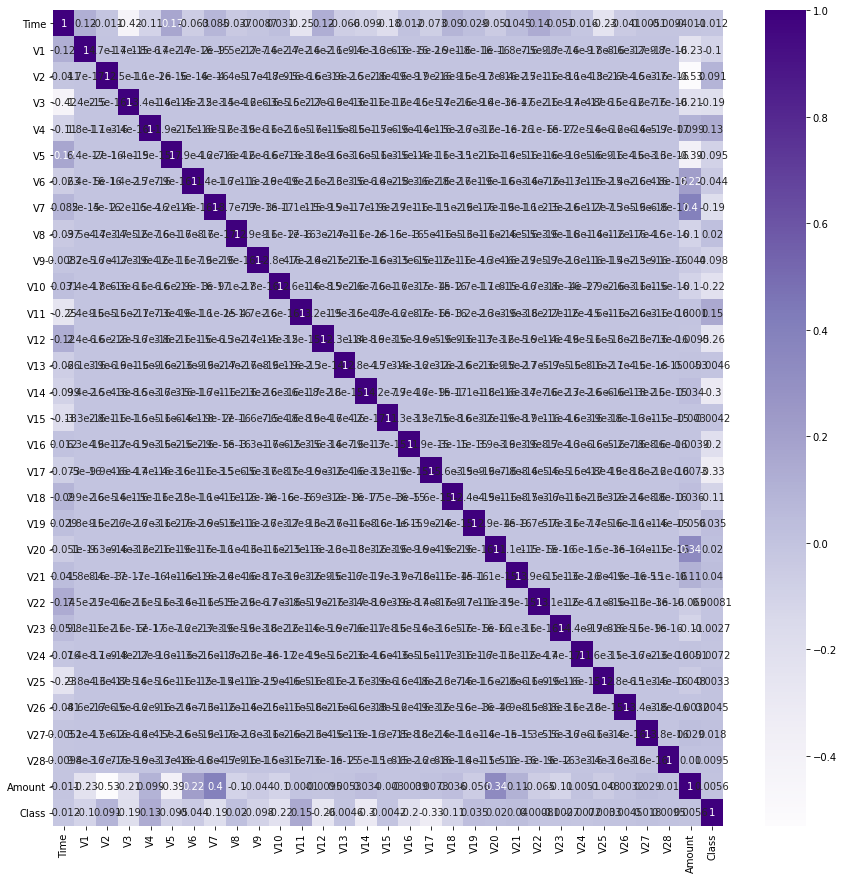

In [ ]:
# Let's check the correlation coefficients of the  variables 
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap="Purples")
plt.show()

In [ ]:
#checking the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#shape of the dataset
df.shape

(284807, 31)

In [ ]:
# Drop unnecessary columns
#we see the time feature as not required over here so we will drop that feature 
df.drop(["Time"],axis=1,inplace=True)

In [ ]:
#checking the columns after dropping the features
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

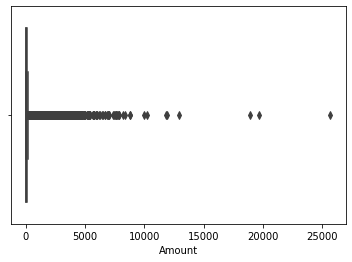

In [ ]:
#Outliers analysis
sns.boxplot(df["Amount"])
plt.show()

- We can see that there is an outliers in the feature Amount that is may be there are few higher transaction

In [ ]:
#Splitting the data into train & test data
X=df.drop("Class",axis=1)
y=df["Class"]

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.30)

In [ ]:
print("total number of fraud:",np.sum(y))
print("Training data:",np.sum(y_train))
print("testing data:",np.sum(y_test))

total number of fraud: 492
Training data: 350
testing data: 142


In [ ]:
#creating list of columns in the dataset
colms=list(X.columns)
colms

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

### Plotting the distribution of a variable

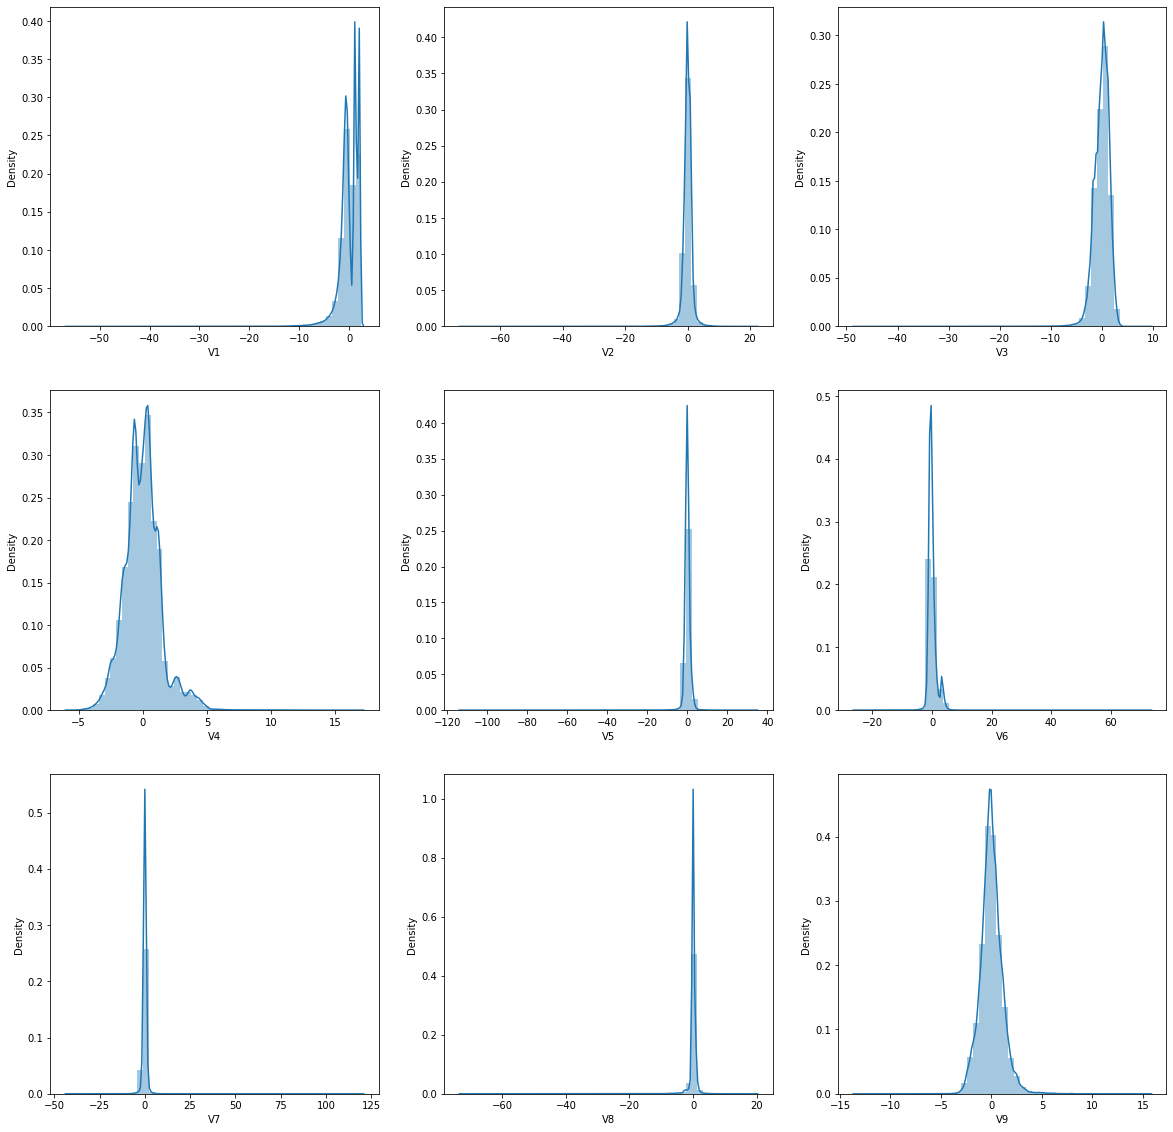

In [ ]:
# plot the distplot of a variable from the dataset to see the skewness
fig, axs = plt.subplots(3,3, figsize = (20,20))
plt1 = sns.distplot(X['V1'], ax = axs[0,0])
plt2 = sns.distplot(X['V2'], ax = axs[0,1])
plt3 = sns.distplot(X['V3'], ax = axs[0,2])
plt4 = sns.distplot(X['V4'], ax = axs[1,0])
plt5 = sns.distplot(X['V5'], ax = axs[1,1])
plt6 = sns.distplot(X['V6'], ax = axs[1,2])
plt7 = sns.distplot(X['V7'], ax = axs[2,0])
plt8 =sns.distplot(X['V8'], ax = axs[2,1])
plt9 = sns.distplot(X['V9'], ax = axs[2,2])

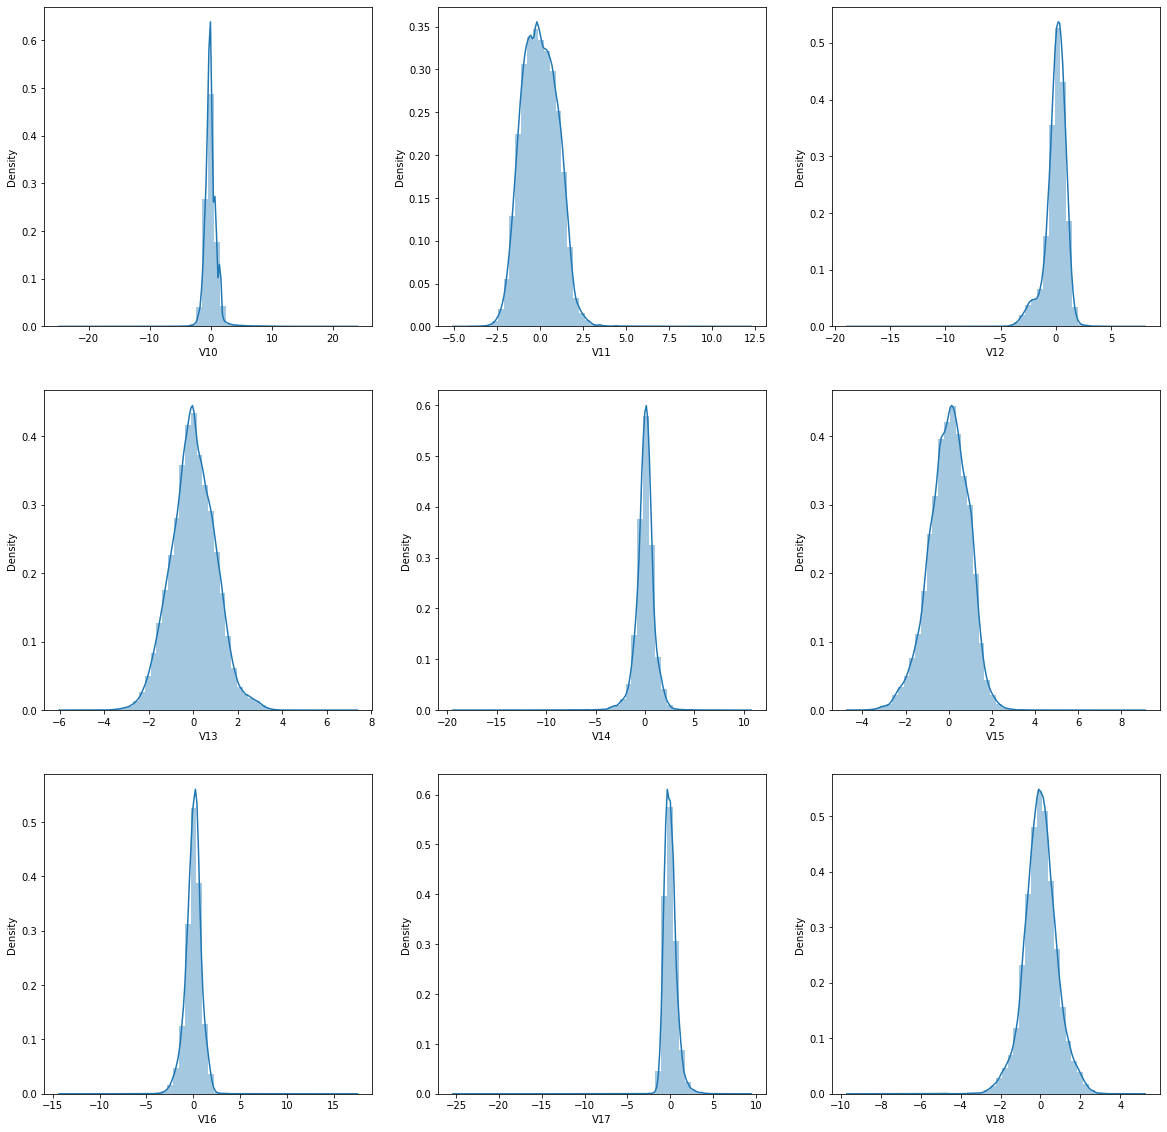

In [ ]:
# plot the distplot of a variable from the dataset to see the skewness
fig, axs = plt.subplots(3,3, figsize = (20,20))
plt1 = sns.distplot(X['V10'], ax = axs[0,0])
plt2 = sns.distplot(X['V11'], ax = axs[0,1])
plt3 = sns.distplot(X['V12'], ax = axs[0,2])
plt4 = sns.distplot(X['V13'], ax = axs[1,0])
plt5 = sns.distplot(X['V14'], ax = axs[1,1])
plt6 = sns.distplot(X['V15'], ax = axs[1,2])
plt7 = sns.distplot(X['V16'], ax = axs[2,0])
plt8 =sns.distplot(X['V17'], ax = axs[2,1])
plt9 = sns.distplot(X['V18'], ax = axs[2,2])

Text(0.5, 1.0, 'V9')

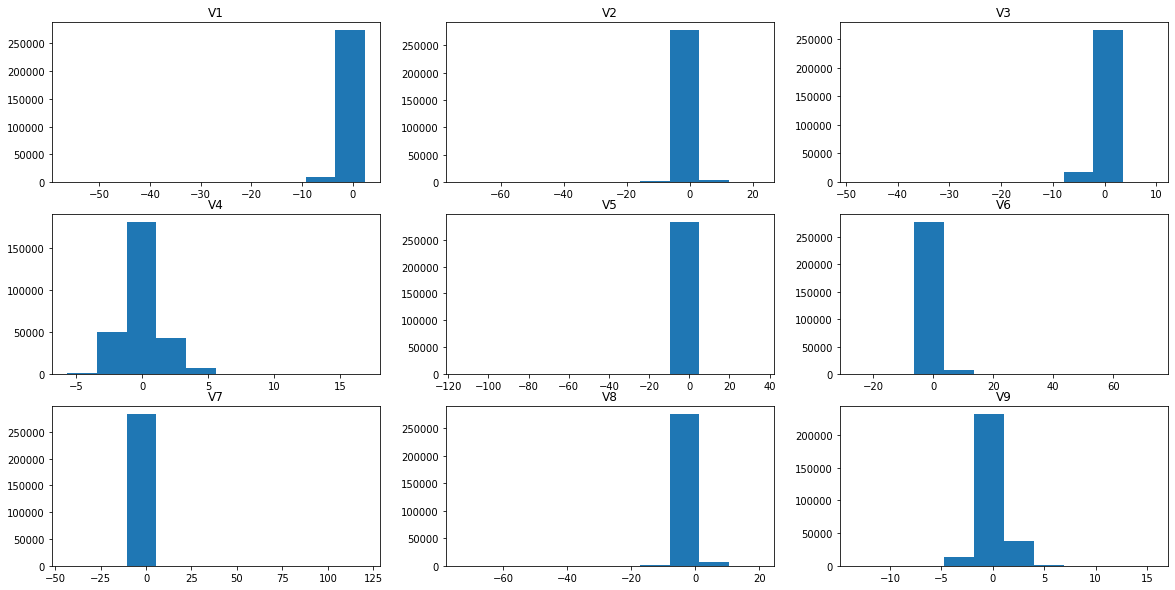

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.hist(X['V1'])
plt.title("V1")
plt.subplot(3,3,2)
plt.hist(X['V2'])
plt.title("V2")
plt.subplot(3,3,3)
plt.hist(X['V3'])
plt.title("V3")
plt.subplot(3,3,4)
plt.hist(X['V4'])
plt.title("V4")
plt.subplot(3,3,5)
plt.hist(X['V5'])
plt.title("V5")
plt.subplot(3,3,6)
plt.hist(X['V6'])
plt.title("V6")
plt.subplot(3,3,7)
plt.hist(X['V7'])
plt.title("V7")
plt.subplot(3,3,8)
plt.hist(X['V8'])
plt.title("V8")
plt.subplot(3,3,9)
plt.hist(X['V9'])
plt.title("V9")


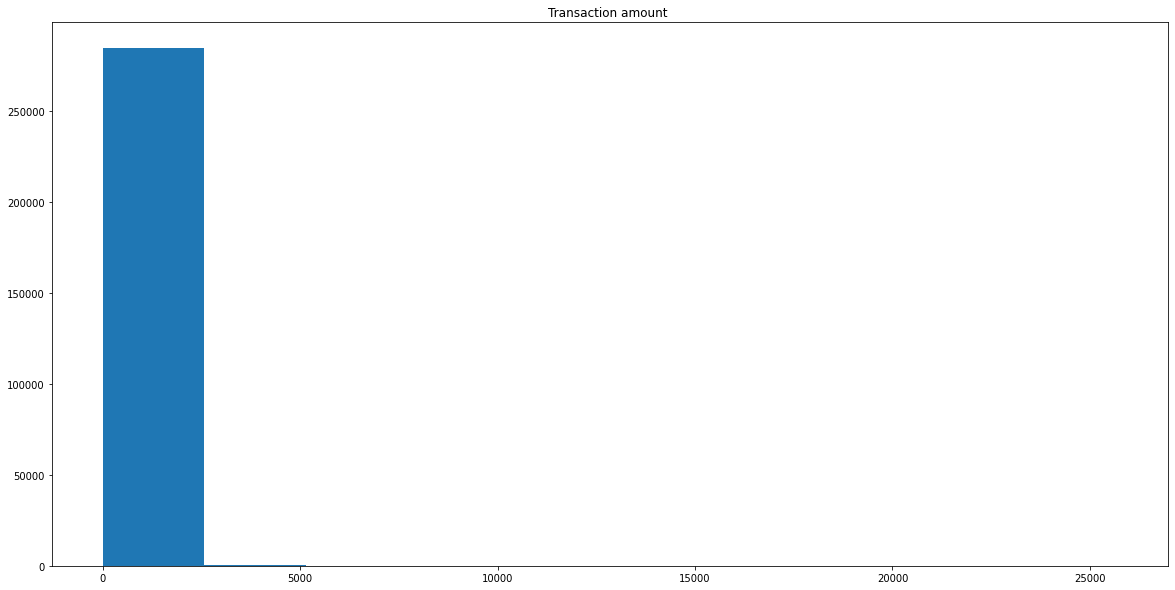

In [ ]:
#visualizing the feature h 
plt.figure(figsize=(20,10))
plt.hist(X["Amount"])
plt.title("Transaction amount ")
plt.show()

If there is skewness present in the distribution use:
Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pow = pt.transform(X_train)    ## Then apply on all data
X_test_pow = pt.transform(X_test)

In [ ]:
#Creating a Dataframe
X_train_df = pd.DataFrame(data=X_train_pow,   columns=colms)
X_test_df= pd.DataFrame(data=X_test_pow,   columns=colms)

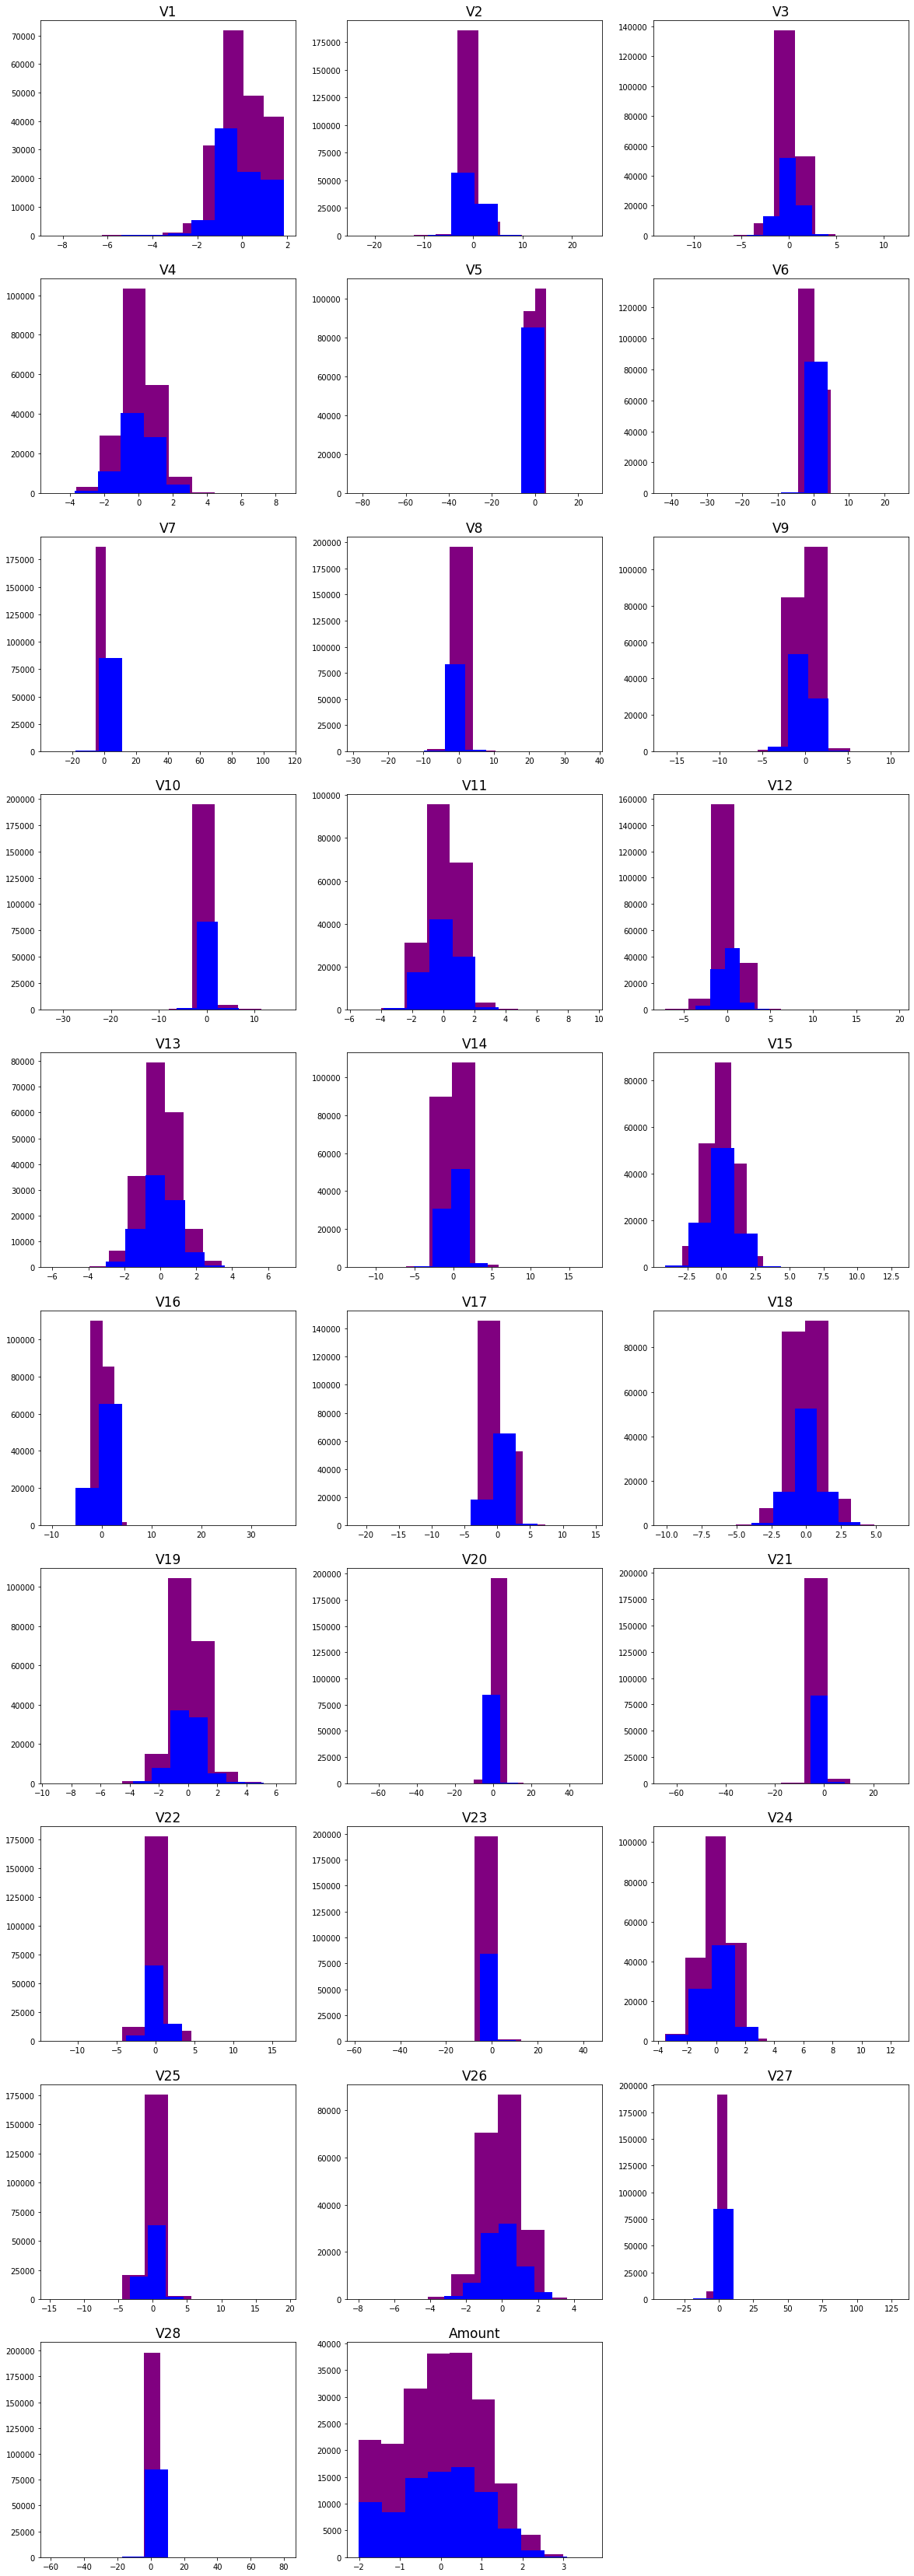

In [ ]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(colms):
  plt.subplot(10,3,n+1)
  plt.hist(X_train_df[col], color='purple')
  plt.hist(X_test_df[col], color='blue')
  plt.title(col, fontsize=17)
plt.show()

We need to scale Amount column.

In [ ]:
# # As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
# scaler = StandardScaler()

# # Scaling the train data
# X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# # Transforming the test data
# X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

# Model Building

## Build different models on the imbalanced dataset and see the result

 # Logistic Regression

In [ ]:

from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
#perform cross validation
lr_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
lr_cv.fit(X_train_df, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', lr_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', lr_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.7s finished


Best ROC AUC score:  0.9848398120731654
Best hyperparameters:  {'C': 0.01}


#Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Applying the best hyperparameter on the model
lr_best_param = LogisticRegression(C=0.01)

# Fitting the model on train dataset
lr_best_param.fit(X_train_df, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Evaluating on train dataset

In [ ]:
# Predictions on the train set
y_train_pred = lr_best_param.predict(X_train_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_trainlr = metrics.confusion_matrix(y_train, y_train_pred)
cm_trainlr

array([[198993,     21],
       [   122,    228]])

In [ ]:
'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_train, y_train_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train, y_train_pred)}")

F1 Score: 76.13%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.92      0.65      0.76       350

    accuracy                           1.00    199364
   macro avg       0.96      0.83      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
#plotting the auc-roc curve for that we will define the function
# ROC Curve function
def draw_roc_auc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Roc curve')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [ ]:
#getting the probability
y_train_pred_proba = lr_best_param.predict_proba(X_train_df)[:,1]

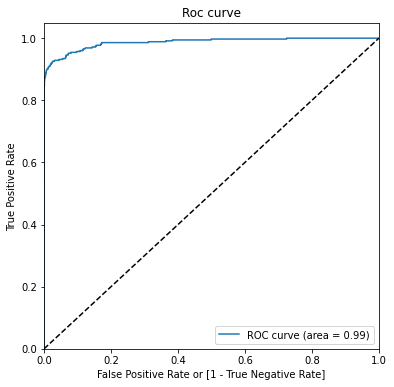

In [ ]:
#plotting roc-auc curve 
draw_roc_auc(y_train,y_train_pred_proba)

## Evaluating the model on the test set¶

In [ ]:
# Predictions on the train set
y_test_pred = lr_best_param.predict(X_test_df)

In [ ]:
# Accuracy of  models
Accuracy_lr = metrics.accuracy_score(y_pred=y_test_pred, y_true=y_test)
print(Accuracy_lr)


0.9991456292499094


In [ ]:
from sklearn import metrics
cm_test_lr = metrics.confusion_matrix(y_test, y_test_pred)
cm_test_lr

array([[85281,    20],
       [   53,    89]])

In [ ]:
#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, y_test_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_test_pred)}")

F1 Score: 70.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.63      0.71       142

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#getting the probability on test dataset
y_test_pred_proba = lr_best_param.predict_proba(X_test_df)[:,1]

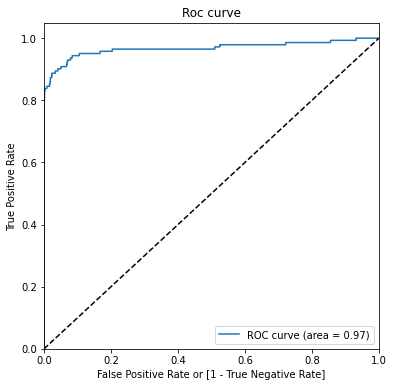

In [ ]:
#displaying  ROC-AUC score plot 

draw_roc_auc(y_test,y_test_pred_proba)

# Decision Tree classifier

In [ ]:
# 'max_depth': range(5, 15, 5),
#     'min_samples_leaf': range(50, 150, 50),
#     'min_samples_split': range(50, 150, 50),

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dtree_gscv.fit(X_train_df, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', dtree_gscv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', dtree_gscv.best_params_)

Best ROC AUC score:  0.9569176825078124
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 70}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Applying the best hyperparameter on the model
#best_param={'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 20}
dtree_best_param = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 5,
                         min_samples_leaf= 120,
                          min_samples_split= 20, 
                        random_state=100) 
#fit model to train dataset
dtree_best_param.fit(X_train_df, y_train)
# Fitting the model on train dataset


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Evaluating on train dataset

In [ ]:
# Predictions on the train set
y_train_pred_dc = dtree_best_param.predict(X_train_df)

#creating the confusion matrix
from sklearn import metrics
cm_train_dtree = metrics.confusion_matrix(y_train, y_train_pred_dc)
print("The confusion matrix is :", cm_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train, y_train_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train, y_train_pred_dc)}")

The confusion matrix is : [[198947     67]
 [    98    252]]


F1 Score: 75.34%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.79      0.72      0.75       350

    accuracy                           1.00    199364
   macro avg       0.89      0.86      0.88    199364
weighted avg       1.00      1.00      1.00    199364



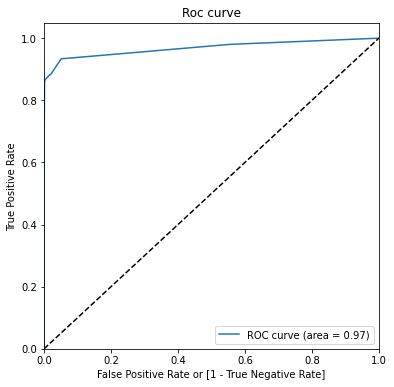

In [ ]:
#getting the probability
y_train_pred_proba_dtree = dtree_best_param.predict_proba(X_train)[:,1]


#displaying  ROC-AUC score plot for the decision tree

draw_roc_auc(y_train,y_train_pred_proba_dtree)


Evaluating on test Dataset

In [ ]:
# Predictions on the train set
y_test_pred_dc = dtree_best_param.predict(X_test_df)

#creating the confusion matrix
from sklearn import metrics
cm_test_dtree = metrics.confusion_matrix(y_test, y_test_pred_dc)
print("The confusion matrix is :", cm_test_dtree)
print()
print()

'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_test, y_test_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_test_pred_dc)}")

The confusion matrix is : [[85255    46]
 [   52    90]]


F1 Score: 64.75%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.66      0.63      0.65       142

    accuracy                           1.00     85443
   macro avg       0.83      0.82      0.82     85443
weighted avg       1.00      1.00      1.00     85443



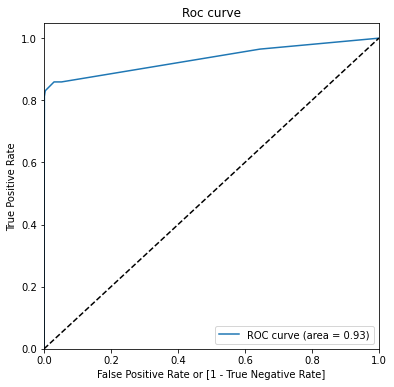

In [ ]:
#getting the probability
y_test_pred_proba_dtree = dtree_best_param.predict_proba(X_test_df)[:,1]


#displaying  ROC-AUC score plot for the decision tree

draw_roc_auc(y_test,y_test_pred_proba_dtree)


# Random Forest

In [ ]:
#building the Randomforest dataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
state=48
st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train_df, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished


Time taken to complete random search:  0:08:22.847701


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv.best_params_)

Best ROC AUC score:  0.9733296243169661
Best hyperparameters:  {'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#applying the best parameters on train dataset
rfc_best_param=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=60,
                           min_samples_split= 5,
                           min_samples_leaf= 10,
                            max_leaf_nodes= 10,
                            max_features= 'auto',
                            max_depth= 7,
                            criterion= 'entropy')
rfc_best_param.fit(X_train_df,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predictions2=rfc_best_param.predict(X_train_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_train_rfc = metrics.confusion_matrix(y_train, predictions2)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train, predictions2)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train, predictions2)}")

The confusion matrix is : [[197336   1678]
 [    31    319]]


F1 Score: 27.18%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199014
           1       0.16      0.91      0.27       350

    accuracy                           0.99    199364
   macro avg       0.58      0.95      0.63    199364
weighted avg       1.00      0.99      0.99    199364



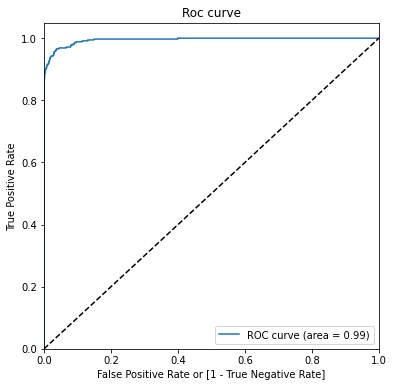

In [ ]:
# Predicted probability
y_train_pred_proba_rfc = rfc_best_param.predict_proba(X_train_df)[:,1]

# Plot the ROC curve
draw_roc_auc(y_train, y_train_pred_proba_rfc)

#### Evaluating on test dataset

In [ ]:
#predicting on test dataset
predictions_rfc_test=rfc_best_param.predict(X_test_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_test_rfc = metrics.confusion_matrix(y_test, predictions_rfc_test)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predictions_rfc_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predictions_rfc_test)}")

The confusion matrix is : [[84554   747]
 [   24   118]]


F1 Score: 23.44%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.14      0.83      0.23       142

    accuracy                           0.99     85443
   macro avg       0.57      0.91      0.61     85443
weighted avg       1.00      0.99      0.99     85443



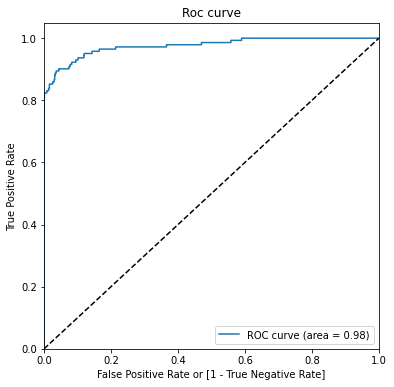

In [ ]:
# Predicted probability
y_test_pred_proba_rfc = rfc_best_param.predict_proba(X_test_df)[:,1]

# Plot the ROC curve
draw_roc_auc(y_test, y_test_pred_proba_rfc)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
st=dt.now()
state=48
tuned_parameters = {'n_neighbors': [3,5,7,9,11],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

knn_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

knn_cv.fit(X_train_df, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 46.9min finished


Time taken to complete random search:  0:46:57.018079


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', knn_cv.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', knn_cv.best_params_)

Best ROC AUC score:  0.8811880990613522
Best hyperparameters:  {'weights': 'distance', 'n_neighbors': 11, 'algorithm': 'ball_tree'}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#applying the best parameters on train dataset
tuned_parameters_best = {'n_neighbors': [11],
                    'weights': ['distance'],
                    'algorithm': ['ball_tree']
                     }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

knn_best_param = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters_best, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)


In [ ]:
knn_best_param.fit(X_train_df, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=5, p=2,
                                                  weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree'],
                                        'n_neighbors': [11],
                                        'weights': ['distance']},
                   pre_dispatch='2*n_jobs', random_state=48, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=5)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predict_knn=knn_best_param.predict(X_train_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
knn_train_cm = metrics.confusion_matrix(y_train, predict_knn)
print("The confusion matrix is :", knn_train_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train, predict_knn)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train, predict_knn)}")

The confusion matrix is : [[199014      0]
 [     0    350]]


F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00       350

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
# Predicted probability
y_train_pred_proba_knn = knn_best_param.predict_proba(X_train_df)[:,1]



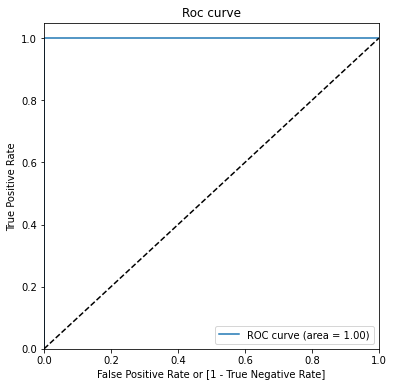

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_train, y_train_pred_proba_knn)

#### Evaluating on Test Dataset

In [ ]:
#predicting on train dataset
predict_knn_test=knn_best_param.predict(X_test_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
knn_test_cm = metrics.confusion_matrix(y_test, predict_knn_test)
print("The confusion matrix is :", knn_test_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predict_knn_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predict_knn_test)}")

The confusion matrix is : [[85287    14]
 [   59    83]]


F1 Score: 69.46%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.86      0.58      0.69       142

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



# XGBoost

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_xg.fit(X_train_df, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  9.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_xg.best_score_)
print(model_xg.best_estimator_)

Best roc auc score :  0.9763240080922851
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [ ]:
#applying the best parameters on train dataset
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
best_model_xg = XGBClassifier(params = params)
best_model_xg.fit(X_train_df, y_train)


# fit the model
best_model_xg.fit(X_train_df, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predict_xg=best_model_xg.predict(X_train_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_train_cm = metrics.confusion_matrix(y_train, predict_xg)
print("The confusion matrix is :", xg_train_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train, predict_xg)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train, predict_xg)}")

The confusion matrix is : [[199005      9]
 [    53    297]]


F1 Score: 90.55%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.85      0.91       350

    accuracy                           1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
# Predicted probability
y_train_pred_proba_xg = best_model_xg.predict_proba(X_train_df)[:,1]


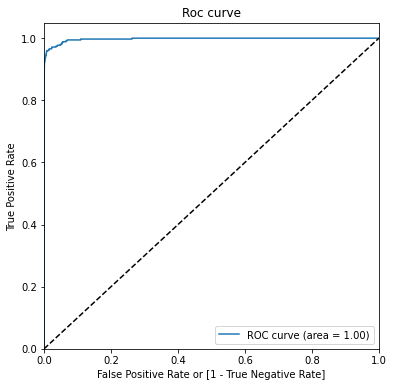

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_train, y_train_pred_proba_xg)

## Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


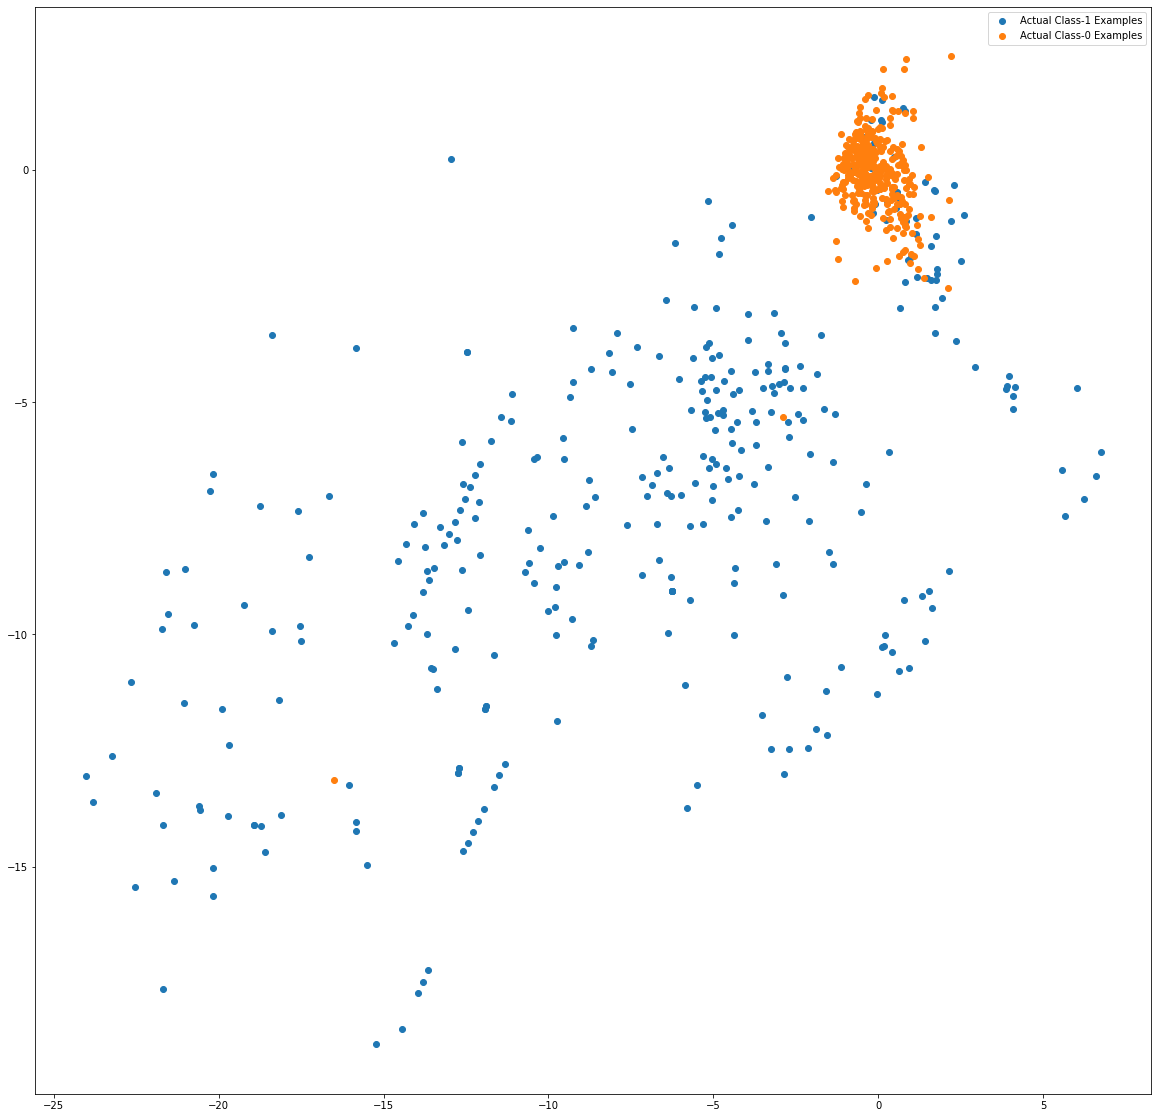

In [ ]:
var_imp = []
for i in best_model_xg.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(best_model_xg.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(best_model_xg.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(best_model_xg.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(best_model_xg.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(best_model_xg.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()




## Model building with balancing Classes
Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Random Sampling 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
#it has to oversample the minority 
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train_df, y_train)

In [ ]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 199014, 1: 350})
New class distribution:- Counter({0: 199014, 1: 199014})


## Logistic Regression model-oversampling

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
#perform cross validation
lr_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
lr_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', lr_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', lr_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.5s finished


Best ROC AUC score:  0.9900992344633852
Best hyperparameters:  {'C': 1}


In [ ]:
# Applying the best hyperparameter on the model
lr_over_param = LogisticRegression(C=100)

# Fitting the model on train dataset
lr_over_param.fit(X_over, y_over)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the train dataset

In [ ]:
# Predictions on the train set
y_over_pred = lr_over_param.predict(X_over)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
over_trainlr = metrics.confusion_matrix(y_over, y_over_pred)
over_trainlr

array([[194317,   4697],
       [ 14596, 184418]])

In [ ]:
'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_over, y_over_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_over, y_over_pred)}")

F1 Score: 95.03%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.98      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



In [ ]:
#getting the probability
y_over_pred_proba = lr_over_param.predict_proba(X_over)[:,1]

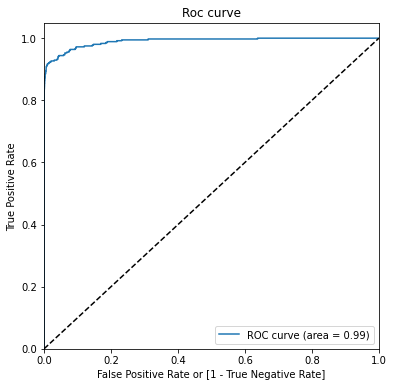

In [ ]:
#plotting roc-auc curve 
draw_roc_auc(y_over,y_over_pred_proba)

## Evaluating on Test dataset

In [ ]:
# Predictions on the test set
y_over_pred_test = lr_over_param.predict(X_test_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
over_testlr = metrics.confusion_matrix(y_test, y_over_pred_test)
print(over_testlr)

'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_test, y_over_pred_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_over_pred_test)}")

[[83214  2087]
 [   15   127]]
F1 Score: 10.78%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.89      0.11       142

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



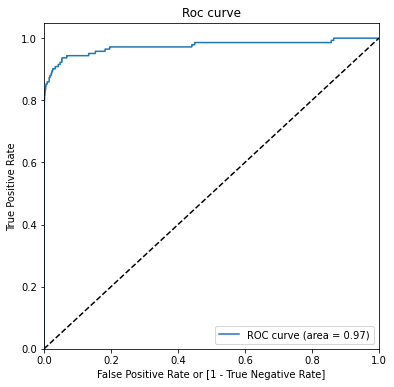

In [ ]:
#getting the probability
ytest_over_pred_proba = lr_over_param.predict_proba(X_test_df)[:,1]

#plotting roc-auc curve 
draw_roc_auc(y_test,ytest_over_pred_proba)

# Decision Tree -oversampling 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_over_cv = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dtree_over_cv.fit(X_over, y_over)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 13.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', dtree_over_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', dtree_over_cv.best_params_)

Best ROC AUC score:  0.9997135974871846
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 70}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Applying the best hyperparameter on the model
#best_param={'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 20}
dtree_best_param_over = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 10,
                         min_samples_leaf= 20,
                          min_samples_split= 70, 
                        random_state=100) 
#fit model to train dataset
dtree_best_param_over.fit(X_over, y_over)
# Fitting the model on train dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

## Evaluating on training dataset

In [ ]:
# Predictions on the train set
y_over_pred_dc = dtree_best_param_over.predict(X_over)

#creating the confusion matrix
from sklearn import metrics
cm_train_dtree = metrics.confusion_matrix(y_over, y_over_pred_dc)
print("The confusion matrix is :", cm_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_over, y_over_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_over, y_over_pred_dc)}")

The confusion matrix is : [[196520   2494]
 [     0 199014]]


F1 Score: 99.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    199014
           1       0.99      1.00      0.99    199014

    accuracy                           0.99    398028
   macro avg       0.99      0.99      0.99    398028
weighted avg       0.99      0.99      0.99    398028



## Evaluating on test dataset

In [ ]:
# Predictions on the train set
y_testover_pred_dc = dtree_best_param_over.predict(X_test_df)

#creating the confusion matrix
from sklearn import metrics
cm_over_train_dtree = metrics.confusion_matrix(y_test, y_testover_pred_dc)
print("The confusion matrix is :", cm_over_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, y_testover_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_testover_pred_dc)}")

The confusion matrix is : [[84202  1099]
 [   30   112]]


F1 Score: 16.56%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.09      0.79      0.17       142

    accuracy                           0.99     85443
   macro avg       0.55      0.89      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
# Predicted probability
y_test_pred_proba_dt = dtree_best_param_over.predict_proba(X_test_df)[:,1]



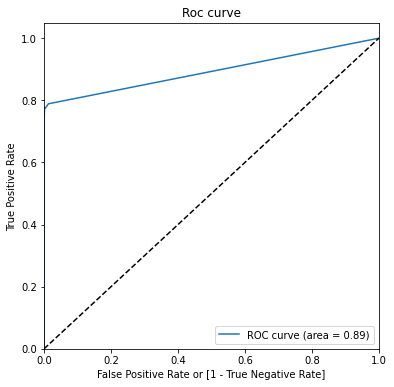

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_test, y_test_pred_proba_dt)

# Random forests-Oversampling

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
state=48
st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv_over = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv_over.fit(X_over, y_over)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.2min finished


Time taken to complete random search:  0:11:44.905321


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv_over.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv_over.best_params_)

Best ROC AUC score:  0.9994110175229363
Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 75, 'max_leaf_nodes': 500, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'entropy'}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#applying the best parameters on train dataset
rfc_best_param_over=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=100,
                           min_samples_split= 9,
                           min_samples_leaf= 75,
                            max_leaf_nodes= 500,
                            max_features= 'log2',
                            max_depth= 7,
                            criterion= 'entropy')
rfc_best_param_over.fit(X_over,y_over)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features='log2',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predictions_rfc=rfc_best_param_over.predict(X_over)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_train_rfc = metrics.confusion_matrix(y_over, predictions_rfc)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_over, predictions_rfc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_over, predictions_rfc)}")

The confusion matrix is : [[198779    235]
 [  8349 190665]]


F1 Score: 97.8%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    199014
           1       1.00      0.96      0.98    199014

    accuracy                           0.98    398028
   macro avg       0.98      0.98      0.98    398028
weighted avg       0.98      0.98      0.98    398028



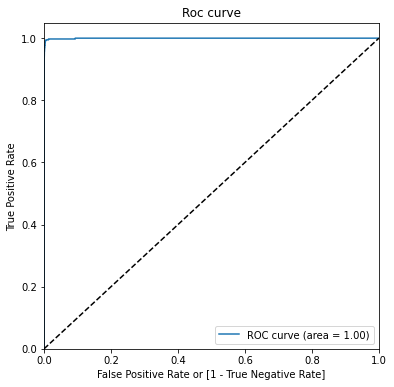

In [ ]:
# Predicted probability
y_train_over_pred_proba_rfc = rfc_best_param_over.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc_auc(y_over, y_train_over_pred_proba_rfc)

#### Evaluating on test dataset

In [ ]:
#predicting on train dataset
predictions_rfc_test=rfc_best_param_over.predict(X_test_df)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_test_rfc = metrics.confusion_matrix(y_test, predictions_rfc_test)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predictions_rfc_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predictions_rfc_test)}")

The confusion matrix is : [[85173   128]
 [   25   117]]


F1 Score: 60.47%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.48      0.82      0.60       142

    accuracy                           1.00     85443
   macro avg       0.74      0.91      0.80     85443
weighted avg       1.00      1.00      1.00     85443



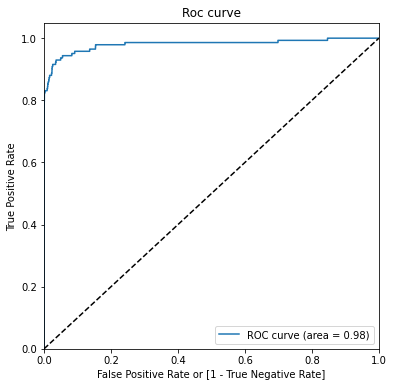

In [ ]:
# Predicted probability
y_test_over_pred_proba_rfc = rfc_best_param_over.predict_proba(X_test_df)[:,1]

# Plot the ROC curve
draw_roc_auc(y_test, y_test_over_pred_proba_rfc)

# KNN-Oversampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
st=dt.now()
state=48
tuned_parameters = {'n_neighbors': [3,5,7,9,11],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

knn_cv_over = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

knn_cv_over.fit(X_over, y_over)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
# #print the evaluation result by choosing a evaluation metric
# print('Best ROC AUC score: ', knn_cv_over.best_score_)
# #print the optimum value of hyperparameters
# # print CV_rfc.best_params_
# print('Best hyperparameters: ', knn_cv_over.best_params_)

- Since the data is huge  it is very slow hence will not proceed to make a knn model
- KNN is also highly interpretable but not preferred when you have a huge amount of data, as it will consume a lot of computation.

# XG Boosting -Oversampling 

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg_over = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_xg_over.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 16.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_xg_over.best_score_)
print(model_xg_over.best_estimator_)

Best roc auc score :  0.9999855731897935
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [ ]:
#applying the best parameters on train dataset
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
best_param_xg_over = XGBClassifier(params = params)
best_param_xg_over.fit(X_over, y_over)


# fit the model
best_param_xg_over.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predict_xg_over=best_param_xg_over.predict(X_over)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_train_cm = metrics.confusion_matrix(y_over, predict_xg_over)
print("The confusion matrix is :", xg_train_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_over, predict_xg_over)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_over, predict_xg_over)}")

The confusion matrix is : [[198249    765]
 [   522 198492]]


F1 Score: 99.68%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



In [ ]:
# Predicted probability
y_over_pred_proba_xg = best_param_xg_over.predict_proba(X_over)[:,1]


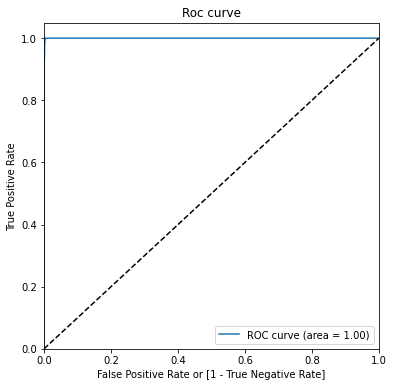

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_over, y_over_pred_proba_xg)

#### Evaluating on test dataset

In [ ]:
#predicting on train dataset
predict_xg_over_test=best_param_xg_over.predict(X_test_df.values)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_train_cm = metrics.confusion_matrix(y_test, predict_xg_over_test)
print("The confusion matrix is :", xg_train_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predict_xg_over_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predict_xg_over_test)}")

The confusion matrix is : [[84921   380]
 [   24   118]]


F1 Score: 36.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.24      0.83      0.37       142

    accuracy                           1.00     85443
   macro avg       0.62      0.91      0.68     85443
weighted avg       1.00      1.00      1.00     85443



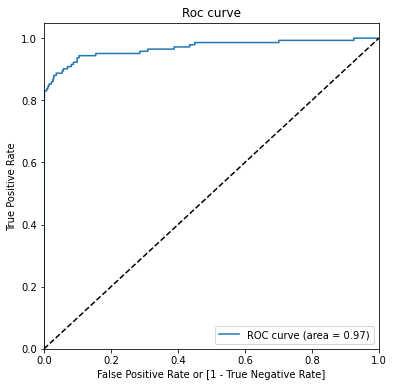

In [ ]:
# Predicted probability
y_over_pred_proba_xg = best_param_xg_over.predict_proba(X_test_df.values)[:,1]

# Plot the ROC curve
draw_roc_auc(y_test, y_over_pred_proba_xg)


## Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 12
3rd Top var = 4


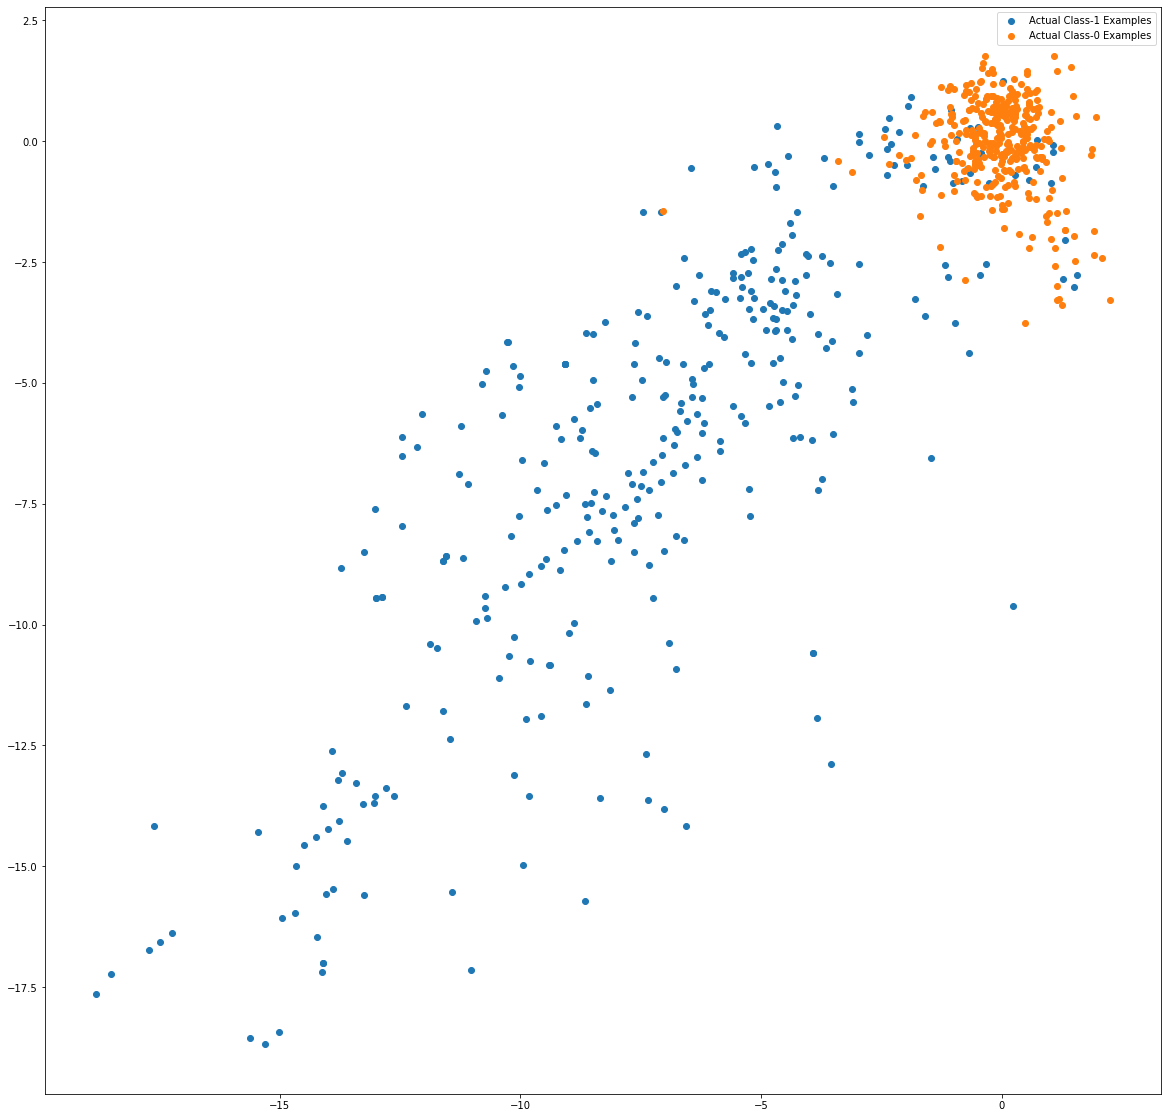

In [ ]:
var_imp = []
for i in best_param_xg_over.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(best_param_xg_over.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(best_param_xg_over.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(best_param_xg_over.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(best_param_xg_over.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(best_param_xg_over.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()




# Print the class distribution after applying SMOTE

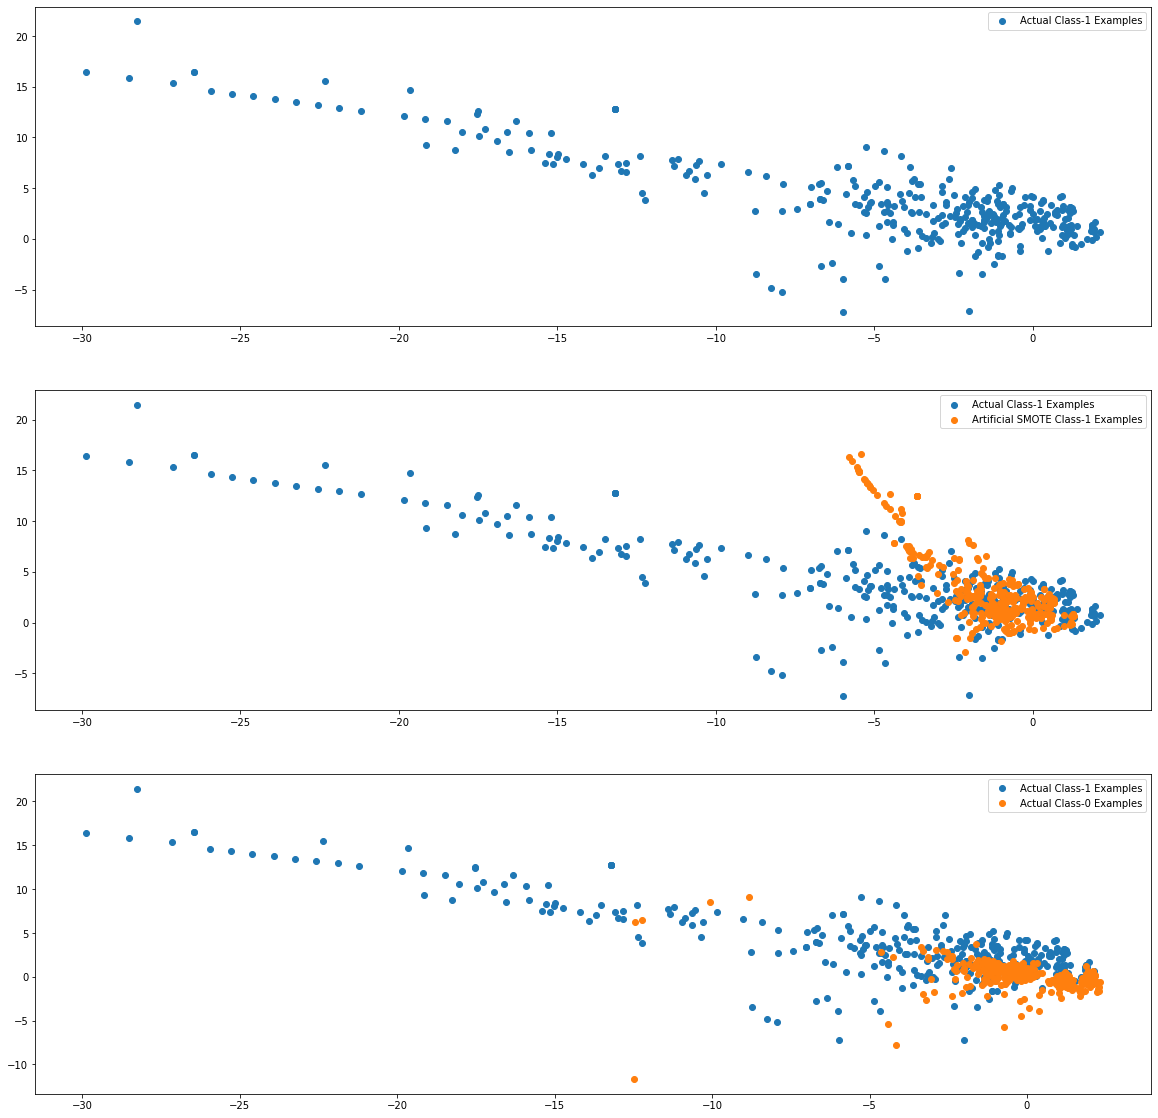

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_df, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression model-smote

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
#perform cross validation
lr_cv_smote = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
lr_cv_smote.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', lr_cv_smote.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', lr_cv_smote.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.0s finished


Best ROC AUC score:  0.9911709336597946
Best hyperparameters:  {'C': 0.1}


In [ ]:
# Applying the best hyperparameter on the model
lr_smote_param = LogisticRegression(C=0.1)

# Fitting the model on train dataset
lr_smote_param.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the train dataset

In [ ]:
# Predictions on the train set
y_smote_pred_lr = lr_smote_param.predict(X_train_smote)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
smote_trainlr = metrics.confusion_matrix(y_train_smote, y_smote_pred_lr)
smote_trainlr

array([[194134,   4880],
       [ 14828, 184186]])

In [ ]:
'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_train_smote, y_smote_pred_lr)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_smote, y_smote_pred_lr)}")

F1 Score: 94.92%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.97      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



In [ ]:
#getting the probability
y_smote_pred_proba = lr_smote_param.predict_proba(X_train_smote)[:,1]

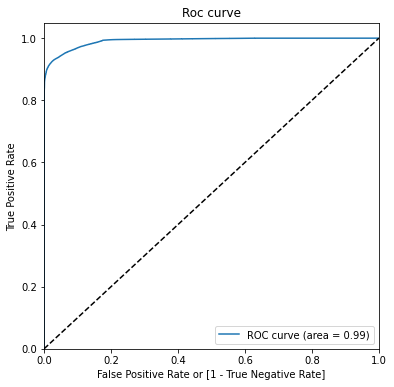

In [ ]:
#plotting roc-auc curve 
draw_roc_auc(y_train_smote,y_smote_pred_proba)

## Evaluating on Test dataset

In [ ]:
# Predictions on the test set
y_smote_pred_test_lr = lr_smote_param.predict(X_test)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
smote_testlr = metrics.confusion_matrix(y_test, y_smote_pred_test_lr)
print(smote_testlr)

'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_test, y_smote_pred_test_lr)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_smote_pred_test_lr)}")

[[42600 42701]
 [    4   138]]
F1 Score: 0.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67     85301
           1       0.00      0.97      0.01       142

    accuracy                           0.50     85443
   macro avg       0.50      0.74      0.34     85443
weighted avg       1.00      0.50      0.67     85443



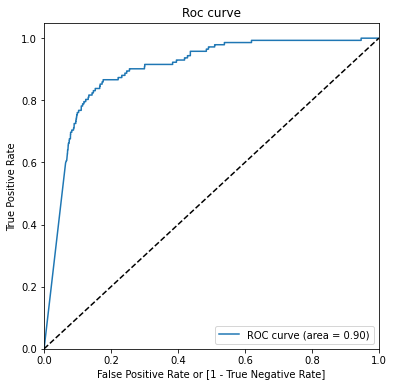

In [ ]:
#getting the probability
ytest_smote_pred_proba_lr = lr_smote_param.predict_proba(X_test)[:,1]

#plotting roc-auc curve 
draw_roc_auc(y_test,ytest_smote_pred_proba_lr)

# Decision Tree classifier-SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv_smote = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dtree_gscv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 24.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', dtree_gscv_smote.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', dtree_gscv_smote.best_params_)

Best ROC AUC score:  0.9989454208078332
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 20}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Applying the best hyperparameter on the model
#best_param={'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 20}
dtree_best_param_smote = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 10,
                         min_samples_leaf= 20,
                          min_samples_split= 20, 
                        random_state=100) 
#fit model to train dataset
dtree_best_param_smote.fit(X_train_smote, y_train_smote)
# Fitting the model on train dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Evaluating on train dataset

In [ ]:
# Predictions on the train set
y_smote_train_pred_dc = dtree_best_param_smote.predict(X_train_smote)

#creating the confusion matrix
from sklearn import metrics
cm_smote_train_dtree = metrics.confusion_matrix(y_train_smote, y_smote_train_pred_dc)
print("The confusion matrix is :", cm_smote_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train_smote, y_smote_train_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_smote, y_smote_train_pred_dc)}")

The confusion matrix is : [[196508   2506]
 [  1754 197260]]


F1 Score: 98.93%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199014
           1       0.99      0.99      0.99    199014

    accuracy                           0.99    398028
   macro avg       0.99      0.99      0.99    398028
weighted avg       0.99      0.99      0.99    398028



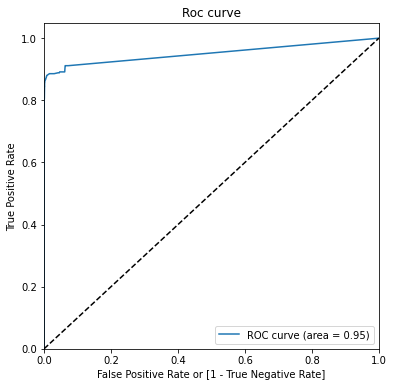

In [ ]:
#getting the probability
y_tr_pred_smote_proba_dtree = dtree_best_param_smote.predict_proba(X_train)[:,1]


#displaying  ROC-AUC score plot for the decision tree

draw_roc_auc(y_train,y_tr_pred_smote_proba_dtree)


### Evaluating on test Dataset

In [ ]:
# Predictions on the train set
y_test_smote_pred_dc = dtree_best_param_smote.predict(X_test)

#creating the confusion matrix
from sklearn import metrics
cm_test_dtree = metrics.confusion_matrix(y_test, y_test_pred_dc)
print("The confusion matrix is :", cm_test_dtree)
print()
print()

'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_test, y_test_smote_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_test_smote_pred_dc)}")

The confusion matrix is : [[85255    46]
 [   52    90]]


F1 Score: 9.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.05      0.80      0.10       142

    accuracy                           0.98     85443
   macro avg       0.53      0.89      0.54     85443
weighted avg       1.00      0.98      0.99     85443



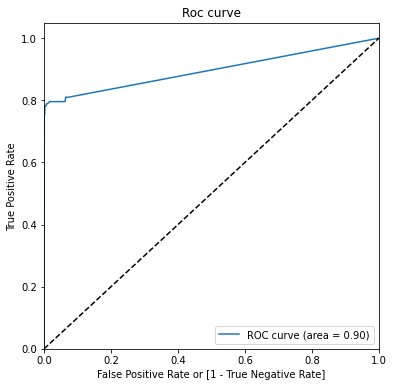

In [ ]:
#getting the probability
y_test_pred_prob_dt_smote = dtree_best_param_smote.predict_proba(X_test)[:,1]


#displaying  ROC-AUC score plot for the decision tree

draw_roc_auc(y_test,y_test_pred_prob_dt_smote)


# Random forests-Smote

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
state=48
st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv_smote = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv_smote.fit(X_train_smote, y_train_smote)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.1min finished


Time taken to complete random search:  0:15:47.330134


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv_smote.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv_smote.best_params_)

Best ROC AUC score:  0.9987737527559908
Best hyperparameters:  {'n_estimators': 30, 'min_samples_split': 7, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#applying the best parameters on train dataset
rfc_best_param_smote=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=30,
                           min_samples_split= 7,
                           min_samples_leaf= 50,
                            max_leaf_nodes= 500,
                            max_features= 'auto',
                            max_depth= 8,
                            criterion= 'gini')
rfc_best_param_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predictions_rfc_smote=rfc_best_param_smote.predict(X_train_smote)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_train_rfc = metrics.confusion_matrix(y_train_smote, predictions_rfc_smote)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train_smote, predictions_rfc_smote)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_smote, predictions_rfc_smote)}")

The confusion matrix is : [[198546    468]
 [  9389 189625]]


F1 Score: 97.47%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98    199014
           1       1.00      0.95      0.97    199014

    accuracy                           0.98    398028
   macro avg       0.98      0.98      0.98    398028
weighted avg       0.98      0.98      0.98    398028



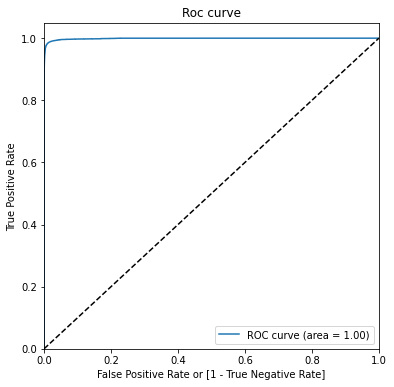

In [ ]:
# Predicted probability
y_train_smote_pred_proba_rfc = rfc_best_param_smote.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc_auc(y_train_smote, y_train_smote_pred_proba_rfc)

#### Evaluating on test dataset

In [ ]:
#predicting on train dataset
predictions_rfc_test=rfc_best_param_smote.predict(X_test)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_test_rfc = metrics.confusion_matrix(y_test, predictions_rfc_test)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predictions_rfc_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predictions_rfc_test)}")

The confusion matrix is : [[84822   479]
 [   23   119]]


F1 Score: 32.16%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.20      0.84      0.32       142

    accuracy                           0.99     85443
   macro avg       0.60      0.92      0.66     85443
weighted avg       1.00      0.99      1.00     85443



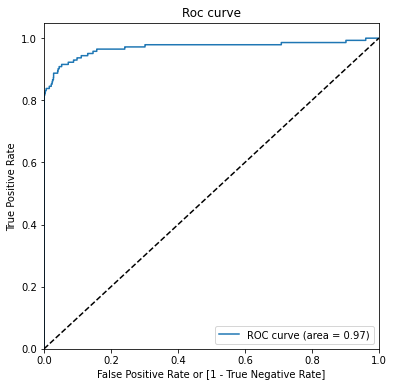

In [ ]:
# Predicted probability
y_test_smote_pred_proba_rfc = rfc_best_param_over.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc_auc(y_test, y_test_smote_pred_proba_rfc)

# XG Boosting -SMOTE

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg_smote = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_xg_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 20.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_xg_smote.best_score_)
print(model_xg_smote.best_estimator_)

Best roc auc score :  0.9999656314236622
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [ ]:
#applying the best parameters on train dataset
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
best_param_xg_smote = XGBClassifier(params = params)

# fit the model
best_param_xg_smote.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predict_xg_smote=best_param_xg_smote.predict(X_train_smote)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_train_cm = metrics.confusion_matrix(y_train_smote, predict_xg_smote)
print("The confusion matrix is :", xg_train_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train_smote, predict_xg_smote)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_smote, predict_xg_smote)}")

The confusion matrix is : [[197183   1831]
 [  3964 195050]]


F1 Score: 98.54%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    199014
           1       0.99      0.98      0.99    199014

    accuracy                           0.99    398028
   macro avg       0.99      0.99      0.99    398028
weighted avg       0.99      0.99      0.99    398028



In [ ]:
# Predicted probability
y_sm_train_pred_proba_xg = best_param_xg_smote.predict_proba(X_train_smote)[:,1]


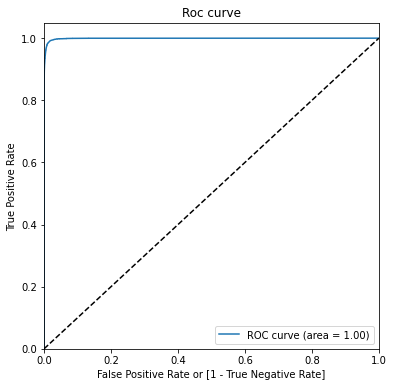

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_train_smote, y_sm_train_pred_proba_xg)

#### Evaluating on test dataset

In [ ]:
#predicting on test dataset
predict_xg_smote_test=best_param_xg_smote.predict(X_test.values)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_test_cm = metrics.confusion_matrix(y_test, predict_xg_smote_test)
print("The confusion matrix is :", xg_test_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predict_xg_smote_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predict_xg_smote_test)}")

The confusion matrix is : [[84423   878]
 [   22   120]]


F1 Score: 21.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.12      0.85      0.21       142

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
# Predicted probability
y_sm_test_pred_proba_xg = best_param_xg_smote.predict_proba(X_test.values)[:,1]


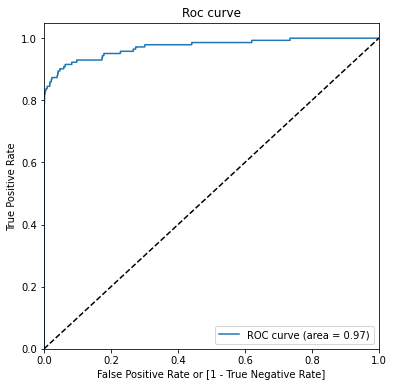

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_test, y_sm_test_pred_proba_xg)

# Print the class distribution after applying ADASYN

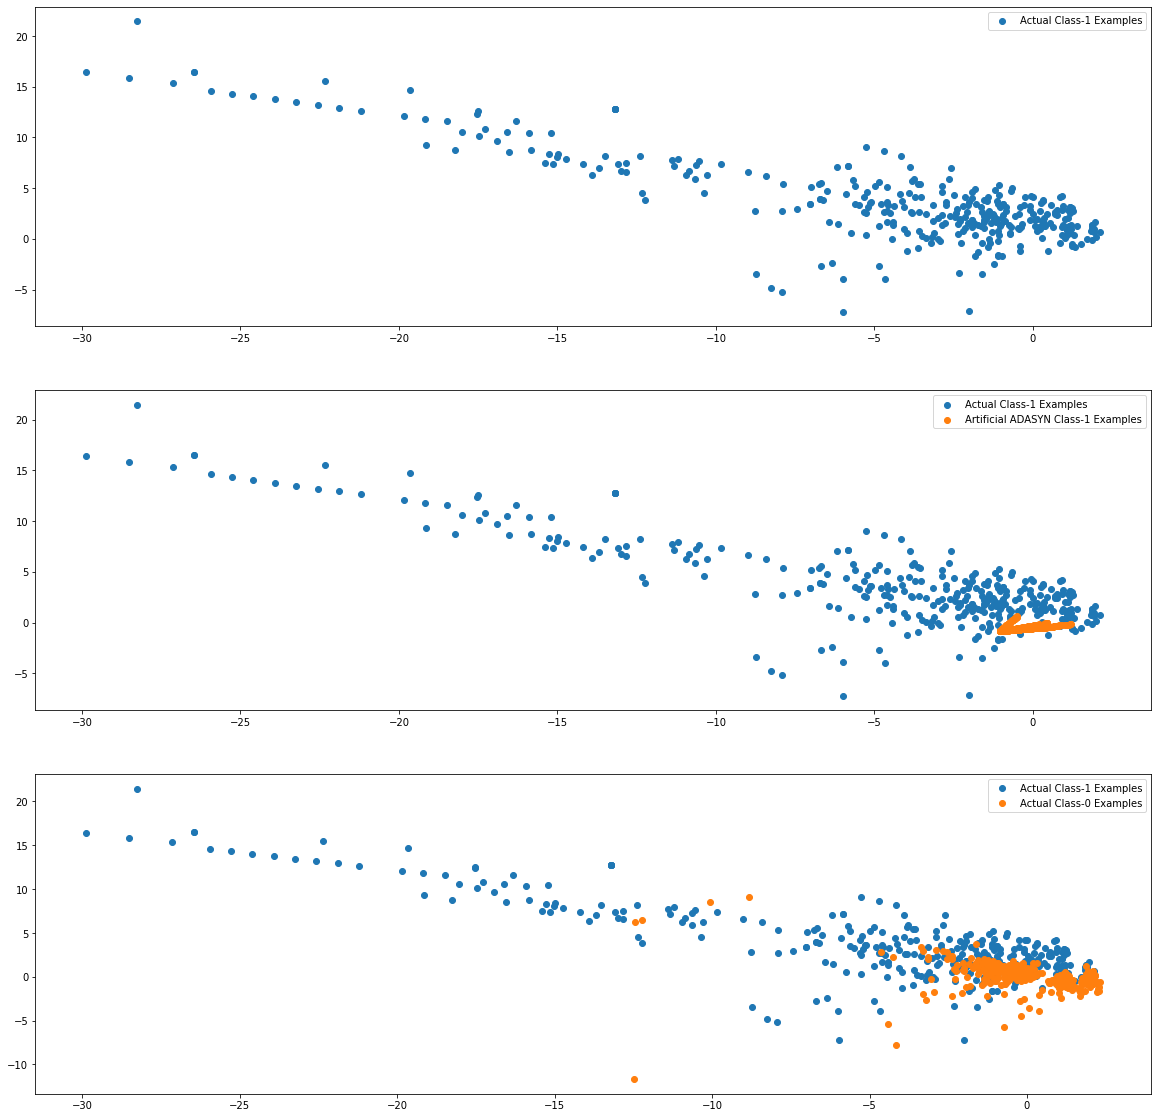

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_df, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression- ADASYN

In [ ]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
#perform cross validation
lr_cv_adasyn = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
lr_cv_adasyn.fit(X_train_adasyn, y_train_adasyn )
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', lr_cv_adasyn.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', lr_cv_adasyn.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.0s finished


Best ROC AUC score:  0.9686687595816462
Best hyperparameters:  {'C': 0.1}


In [ ]:
# Applying the best hyperparameter on the model
lr_adasyn_param = LogisticRegression(C=0.1)

# Fitting the model on train dataset
lr_adasyn_param.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the train dataset

In [ ]:
# Predictions on the train set
y_adasyn_pred_lr = lr_adasyn_param.predict(X_train_adasyn)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
adasyn_trainlr = metrics.confusion_matrix(y_train_adasyn, y_adasyn_pred_lr)
adasyn_trainlr

array([[181700,  17314],
       [ 26780, 172224]])

In [ ]:
'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_train_adasyn, y_adasyn_pred_lr)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_adasyn, y_adasyn_pred_lr)}")

F1 Score: 88.65%
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    199014
           1       0.91      0.87      0.89    199004

    accuracy                           0.89    398018
   macro avg       0.89      0.89      0.89    398018
weighted avg       0.89      0.89      0.89    398018



In [ ]:
#getting the probability
y_adasyn_pred_proba_lr = lr_adasyn_param.predict_proba(X_train_adasyn)[:,1]

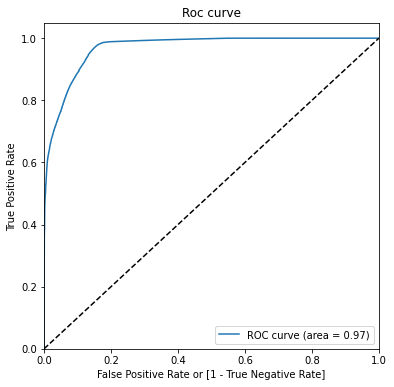

In [ ]:
#plotting roc-auc curve 
draw_roc_auc(y_train_adasyn,y_adasyn_pred_proba_lr)

## Evaluating on Test dataset

In [ ]:
# Predictions on the test set
y_adasyn_pred_test_lr = lr_adasyn_param.predict(X_test)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
adasyn_testlr = metrics.confusion_matrix(y_test, y_adasyn_pred_test_lr)
print(adasyn_testlr)

'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_test, y_adasyn_pred_test_lr)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_adasyn_pred_test_lr)}")

[[79938  5363]
 [   19   123]]
F1 Score: 4.37%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85301
           1       0.02      0.87      0.04       142

    accuracy                           0.94     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.94      0.97     85443



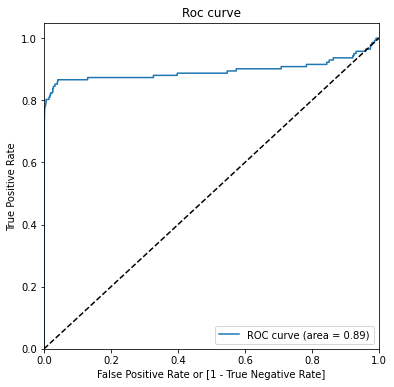

In [ ]:
#getting the probability
ytest_adasyn_pred_proba_lr = lr_adasyn_param.predict_proba(X_test)[:,1]

#plotting roc-auc curve 
draw_roc_auc(y_test,ytest_adasyn_pred_proba_lr)

# Decision Tree Adasyn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv_adasyn = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dtree_gscv_adasyn.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 24.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', dtree_gscv_adasyn.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', dtree_gscv_adasyn.best_params_)

Best ROC AUC score:  0.9588711734211701
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 20}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Applying the best hyperparameter on the model
#best_param={'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 20}
dtree_best_param_adasyn = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 10,
                         min_samples_leaf= 120,
                          min_samples_split= 20, 
                        random_state=100) 
#fit model to train dataset
dtree_best_param_adasyn.fit(X_train_adasyn, y_train_adasyn)
# Fitting the model on train dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Evaluating on train dataset

In [ ]:
# Predictions on the train set
y_adsyn_trn_pred_dc = dtree_best_param_adasyn.predict(X_train_adasyn)

#creating the confusion matrix
from sklearn import metrics
cm_adasyn_train_dtree = metrics.confusion_matrix(y_train_adasyn, y_adsyn_trn_pred_dc)
print("The confusion matrix is :", cm_adasyn_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train_adasyn, y_adsyn_trn_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_adasyn, y_adsyn_trn_pred_dc)}")

The confusion matrix is : [[186605  12409]
 [   493 198511]]


F1 Score: 96.85%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    199014
           1       0.94      1.00      0.97    199004

    accuracy                           0.97    398018
   macro avg       0.97      0.97      0.97    398018
weighted avg       0.97      0.97      0.97    398018



In [ ]:
#getting the probability
y_tr_pred_adsn_prob_dt= dtree_best_param_adasyn.predict_proba(X_train_adasyn)[:,1]

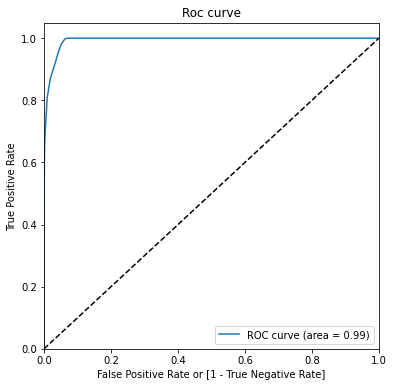

In [ ]:
#displaying  ROC-AUC score plot for the decision tree

draw_roc_auc(y_train_adasyn,y_tr_pred_adsn_prob_dt)

### Evaluating on test Dataset

In [ ]:
# Predictions on the train set
y_test_adasyn_pred_dc = dtree_best_param_adasyn.predict(X_test)

#creating the confusion matrix
from sklearn import metrics
cm_test_dtree_adsn = metrics.confusion_matrix(y_test, y_test_adasyn_pred_dc)
print("The confusion matrix is :", cm_test_dtree_adsn)
print()
print()



The confusion matrix is : [[80558  4743]
 [   21   121]]




In [ ]:
'''
Display f1 score and classification report of a model.
    '''
print(f"F1 Score: {round(f1_score(y_test, y_test_adasyn_pred_dc)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_test_adasyn_pred_dc)}")

F1 Score: 4.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85301
           1       0.02      0.85      0.05       142

    accuracy                           0.94     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.94      0.97     85443



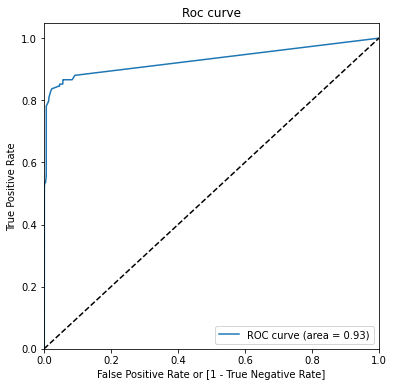

In [ ]:
#getting the probability
y_test_pred_prob_dt_adasyn = dtree_best_param_adasyn.predict_proba(X_test)[:,1]


#displaying  ROC-AUC score plot for the decision tree

draw_roc_auc(y_test,y_test_pred_prob_dt_adasyn)


# Random Forest- ADASYN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
state=48
st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv_adasyn = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv_adasyn.fit(X_train_adasyn, y_train_adasyn)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.4min finished


Time taken to complete random search:  0:16:05.332201


In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv_adasyn.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv_adasyn.best_params_)

Best ROC AUC score:  0.9818579039163199
Best hyperparameters:  {'n_estimators': 30, 'min_samples_split': 7, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#applying the best parameters on train dataset
rfc_best_param_adasyn=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=30,
                           min_samples_split= 7,
                           min_samples_leaf= 50,
                            max_leaf_nodes= 500,
                            max_features= 'auto',
                            max_depth= 8,
                            criterion= 'gini')
rfc_best_param_adasyn.fit(X_train_adasyn, y_train_adasyn)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
pred_rfc_train_adasyn=rfc_best_param_adasyn.predict(X_train_adasyn)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_train_rfc = metrics.confusion_matrix(y_train_adasyn, pred_rfc_train_adasyn)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train_adasyn, pred_rfc_train_adasyn)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_adasyn, pred_rfc_train_adasyn)}")

The confusion matrix is : [[195105   3909]
 [  3982 195022]]


F1 Score: 98.02%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    199014
           1       0.98      0.98      0.98    199004

    accuracy                           0.98    398018
   macro avg       0.98      0.98      0.98    398018
weighted avg       0.98      0.98      0.98    398018



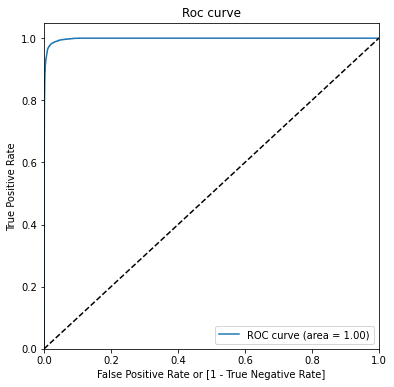

In [ ]:
# Predicted probability
y_train_adsyn_pred_proba_rfc = rfc_best_param_adasyn.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc_auc(y_train_adasyn, y_train_adsyn_pred_proba_rfc)

#### Evaluating on test dataset

In [ ]:
#predicting on train dataset
predictions_rfc_test=rfc_best_param_adasyn.predict(X_test)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
cm_test_rfc = metrics.confusion_matrix(y_test, predictions_rfc_test)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predictions_rfc_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predictions_rfc_test)}")

The confusion matrix is : [[83102  2199]
 [   21   121]]


F1 Score: 9.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.05      0.85      0.10       142

    accuracy                           0.97     85443
   macro avg       0.53      0.91      0.54     85443
weighted avg       1.00      0.97      0.99     85443



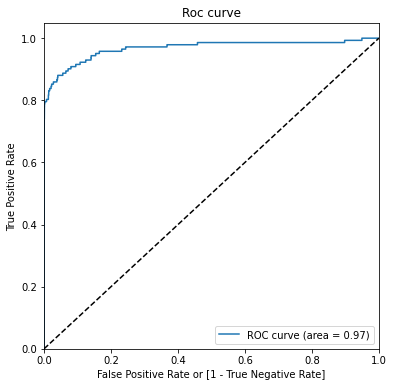

In [ ]:
# Predicted probability
y_test_adasyn_pred_proba_rfc = rfc_best_param_adasyn.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc_auc(y_test, y_test_adasyn_pred_proba_rfc)

# XG BOOsting - ADSAYN

In [ ]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg_adasyn = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_xg_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 18.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

## Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_xg_adasyn.best_score_)
print(model_xg_adasyn.best_estimator_)

Best roc auc score :  0.9910039055678818
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)


In [ ]:
#applying the best parameters on train dataset
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
best_param_xg_adasyn= XGBClassifier(params = params)
best_param_xg_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

#### Evaluating on train dataset

In [ ]:
#predicting on train dataset
predict_xg_adasyn_trn=best_param_xg_adasyn.predict(X_train_adasyn)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_train_cm1 = metrics.confusion_matrix(y_train_adasyn, predict_xg_adasyn_trn)
print("The confusion matrix is :", xg_train_cm1)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_train_adasyn, predict_xg_adasyn_trn)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_train_adasyn, predict_xg_adasyn_trn)}")

The confusion matrix is : [[193290   5724]
 [  2513 196491]]


F1 Score: 97.95%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    199014
           1       0.97      0.99      0.98    199004

    accuracy                           0.98    398018
   macro avg       0.98      0.98      0.98    398018
weighted avg       0.98      0.98      0.98    398018



In [ ]:
# Predicted probability
y_ad_train_pred_proba_xg = best_param_xg_adasyn.predict_proba(X_train_adasyn)[:,1]


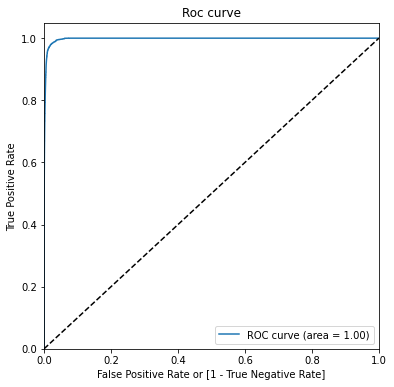

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_train_adasyn, y_ad_train_pred_proba_xg)

#### Evaluating on test dataset

In [ ]:
#predicting on test dataset
predict_xg_ad_test=best_param_xg_adasyn.predict(X_test.values)

In [ ]:
#creating the confusion matrix
from sklearn import metrics
xg_test_cm = metrics.confusion_matrix(y_test, predict_xg_ad_test)
print("The confusion matrix is :", xg_test_cm)
print()
print()

#Display f1 score and classification report of a model.
   
print(f"F1 Score: {round(f1_score(y_test, predict_xg_ad_test)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, predict_xg_ad_test)}")

The confusion matrix is : [[82921  2380]
 [   20   122]]


F1 Score: 9.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.05      0.86      0.09       142

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [ ]:
# Predicted probability
y_ad_test_pred_proba_xg = best_param_xg_adasyn.predict_proba(X_test.values)[:,1]


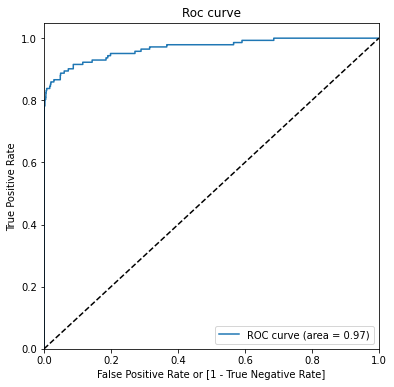

In [ ]:
# Plot the ROC curve
draw_roc_auc(y_test, y_ad_test_pred_proba_xg)

- Since the performace of the Random forest and XGboosting model is similar we will proceed with the XG boosting model only 

# Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


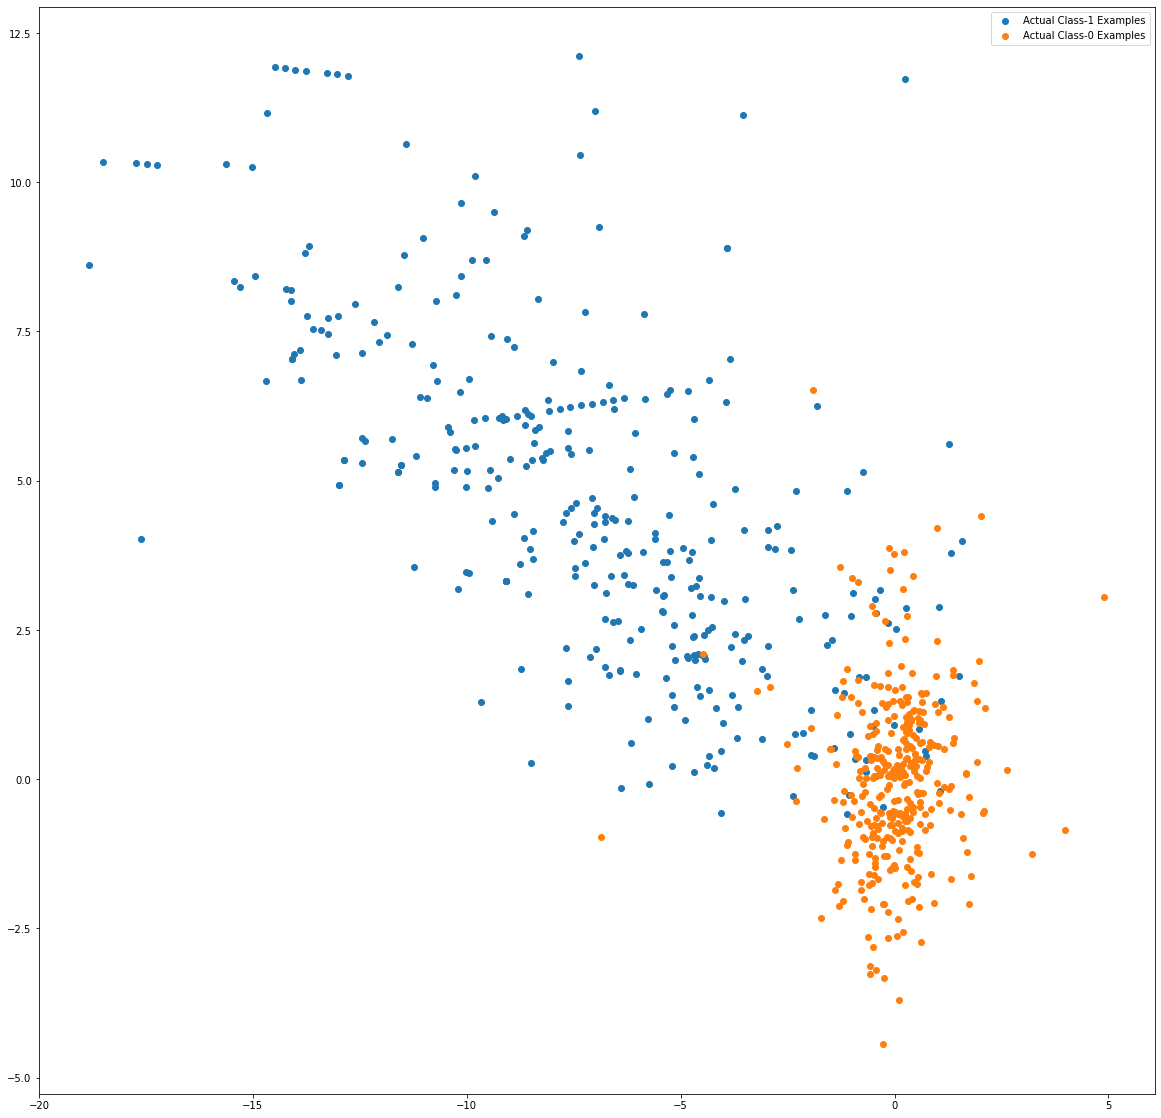

In [ ]:
var_imp = []
for i in best_param_xg_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(best_param_xg_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(best_param_xg_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(best_param_xg_adasyn.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(best_param_xg_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(best_param_xg_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
# Calculate roc auc
# XGB_roc_value = roc_auc_score(y_test, XGB_probs)

# print("XGboost roc_value: {0}" .format(XGB_roc_value))
# fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
# threshold = thresholds[np.argmax(tpr-fpr)]
# print("XGBoost threshold: {0}".format(threshold))


### XGBoosting 
print("XGBoosting train  Auc ")
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_ad_train_pred_proba_xg))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_ad_train_pred_proba_xg)
threshold = thresholds[np.argmax(tpr-fpr)]
print("the threhold is :", threshold)

print("")
print("")
print("XGBoosting test Auc ")
### XGBoosting 

print('Train auc =', metrics.roc_auc_score(y_test, y_ad_test_pred_proba_xg))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_ad_test_pred_proba_xg)
threshold = thresholds[np.argmax(tpr-fpr)]
print("The threshold is :" , threshold)



XGBoosting train  Auc 
Train auc = 0.9976394439823197
0.56899625


XGBoosting test Auc 
Train auc = 0.9682129777056261
0.5855378


### Conclusion for the business

- Recall quantifies the number of positive class predictions made out of all positive examples in the dataset. 

- Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,which the model has to predict .

- After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(99%) .Although tuning is required .Hence, we can go with the XGBoost model here.

# Thank you !!!